# **Важно!**

Домашнее задание состоит из нескольких задач, которые вам нужно решить.
*   Баллы выставляются по принципу выполнено/невыполнено.
*   За каждую выполненую задачу вы получаете баллы (количество баллов за задание указано в скобках).

**Инструкция:** выполните задания в этом же ноутбуке (места под решения **каждой** задачи обозначаются как **#НАЧАЛО ВАШЕГО РЕШЕНИЯ** и **#КОНЕЦ ВАШЕГО РЕШЕНИЯ**).

**Как отправить задание на проверку:** вам необходимо сохранить решение в данном блокноте и отправить итоговый **файл .IPYNB** на учебной платформе в **стандартную форму сдачи домашнего задания.**

**Сроки проверки:** преподаватель проверит домашнее задание в течение недели после дедлайна и даст вам обратную связь.

# **Перед выполнением задания**

1. **Перезапустите ядро (restart the kernel):** в меню выбрать **Ядро (Kernel)**
→ **Перезапустить (Restart).**
2. **Выполните** **все ячейки (run all cells)**: в меню выбрать **Ячейка (Cell)**
→ **Запустить все (Run All)**.

После ячеек с заданием следуют ячейки с проверкой **с помощью assert**: если в коде есть ошибки, assert выведет уведомление об ошибке; если в коде нет ошибок, assert отработает без вывода дополнительной информации.

---

In [1]:
# Запустите эту ячейку для первоначальной настройки
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rc('lines', linewidth=2)

# Домашнее задание 7. Обучение без учителя. Кластеризация. Снижение размерности данных

**Цель:**

* Применить на практике такие методы, как кластеризация и снижение размерности.


# Условия домашней работы

Библиотека `scikit-learn` предоставляет несколько встроенных наборов данных, которые можно использовать для тестирования алгоритмов кластеризации. Наиболее подходящие:

* `sklearn.datasets.make_blobs` — набор данных, который генерирует синтетические кластеры в форме кругов, эллипсов или свободных облаков точек. Он полезен для тестирования алгоритмов кластеризации на наборах данных с явно различимыми кластерами.

* `sklearn.datasets.make_moons` и `sklearn.datasets.make_circles` — наборы данных, которые также генерируют синтетические кластеры, но в форме полумесяца и круга. Они полезны для тестирования алгоритмов, которые должны обнаруживать нелинейные связи между точками данных.

* `sklearn.datasets.load_iris` — классический набор данных ирисов Фишера. Он содержит измерения цветков ирисов в трех разных видах. Этот набор данных часто используется для тестирования алгоритмов кластеризации.

* `sklearn.datasets.load_digits` — набор данных, который состоит из изображений рукописных цифр от 0 до 9. Он может быть полезным для тестирования алгоритмов кластеризации на задачах с изображениями.



**Задание 1 (1 балл)**

Сгенерируйте синтетические данные, необходимые для тестирования алгоритмов кластеризации. Мы будем использовать [`sklearn.datasets.make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html), [`sklearn.datasets.make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) и [`sklearn.datasets.make_circles`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html).

Ознакомьтесь с документацией scikit-learn по ссылкам. Создайте три набора данных, каждый по 500 строк. Для облаков точек задайте 4 центра. Для полумесяцев и кругов задайте параметр шума равным 0.05. Для кругов задайте коэффициент масштабирования между внутренним и внешним кругом равным 0.5. Задайте `random_state=42` для всех данных.

Сохраните данные в переменные (`X_blobs, y_blobs`), (`X_moons, y_moons`) и (`X_circles, y_circles`).

Значения этих параметров не повлияют на проверку заданий, поэтому вы можете поиграть с их значениями. Попробуйте варьировать `random_state`, чтобы получать различные формы.

*Note:*
 самостоятельно импортируйте библиотеки.

In [2]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
from sklearn.datasets import make_blobs, make_moons, make_circles

X_blobs, y_blobs = make_blobs(n_samples=500, centers=4, random_state=42)
X_moons, y_moons = make_moons(n_samples=500, noise=0.05, random_state=42)
X_circles, y_circles = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

## Часть 1. K-Means

Для начала вам предстоит вручную реализовать метод кластеризации K-Means.


**Задание 2 (1 балл)**

 Напишите функцию `initialize_centroids` случайным образом задающую `k` центроид для заданного набора данных `data`. Для этого случайным образом выберите k примеров с помощью `np.random.choice`. Чтобы избежать повторов, воспользуйтесь флагом `replace`.

In [3]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    return data[indices]
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [4]:
k = 3
centroid_blobs = initialize_centroids(X_blobs, k)
assert centroid_blobs.shape == (k, X_blobs.shape[1])

**Задание 3 (1 балл)**

 Реализуйте функцию `assign_clusters`, распределяющие данные к ближайшему центроиду. Для оценки расстояния воспользуйтесь нормой `np.linalg.norm`. Функция должна принимать данные `data` и список координат центроидов `centroids`, а возвращать список индексов ближайших цетроидов (по одному индексу для каждой строчки данных).

In [5]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
def assign_clusters(data, centroids):
    cluster_indices = np.zeros(data.shape[0], dtype=int)

    for i, point in enumerate(data):
        distances = np.linalg.norm(centroids - point, axis=1)
        cluster_indices[i] = np.argmin(distances)

    return cluster_indices
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [6]:
labels = assign_clusters(X_blobs, centroid_blobs)

assert len(labels) == len(X_blobs)
assert np.all(np.isin(labels, np.arange(k)))

**Задание 4 (2 балла)**

 Реализуйте функцию `update_centroids`, передвигающую центроиды в геометрический центр созданных вокруг них кластеров. Для оценки расстояния воспользуйтесь нормой `np.linalg.norm`. Функция должна принимать данные `data`, список индексов центроидов `labels`, а также число центроидов `k`. Функция должна возвращать обновленный список центроидов.

In [7]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
def update_centroids(data, labels, k):
    new_centroids = np.zeros((k, data.shape[1]))

    for i in range(k):
        cluster_points = data[labels == i]

        if cluster_points.shape[0] > 0:
            new_centroids[i] = np.mean(cluster_points, axis=0)
        else:
            new_centroids[i] = data[np.random.choice(data.shape[0], 1)]

    return new_centroids
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [8]:
assert len(update_centroids(X_blobs, labels, k)) == k

Теперь у нас есть ключевые ингредиенты для реализации функциия k-means.

**Задание 5 (1 балл).**

 Реализуйте функцию `k_means`. Итеративно обновляйте центроиды, пока число итераций не достигнет `max_iter`. Функция должна возвращать список координат центроидов, а также список индексов ближайших центроидов к точкам из данных.

In [ ]:
def k_means(data, k, max_iter=100, random_state=0):
    np.random.seed(random_state)
    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    centroids = initialize_centroids(data, k)

    for _ in range(max_iter):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids
    # КОНЕЦ ВАШЕГО РЕШЕНИЯ
    return centroids, labels

In [10]:
centroids, labels = k_means(X_blobs, 4, max_iter=5, random_state=42)

Проверим работу алгоритма, визуализировав результаты для первых четырех итераций. Обратите внимание, как быстро центроиды сошлись к оптимальному положению.

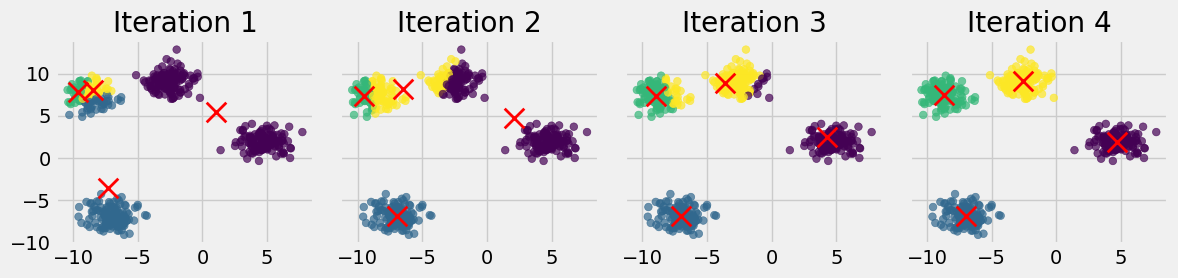

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharex=True, sharey=True)

for i, ax in enumerate(axes):
    centroids, labels = k_means(X_blobs, 4, max_iter=i+1, random_state=42)
    ax.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels, s=30, cmap='viridis', alpha=0.7)
    ax.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], c='red', marker='x', s=200)
    ax.set_title(f"Iteration {i+1}")

plt.tight_layout()
plt.show()

Посмотрим, как работает наш k-means на данных других форм.

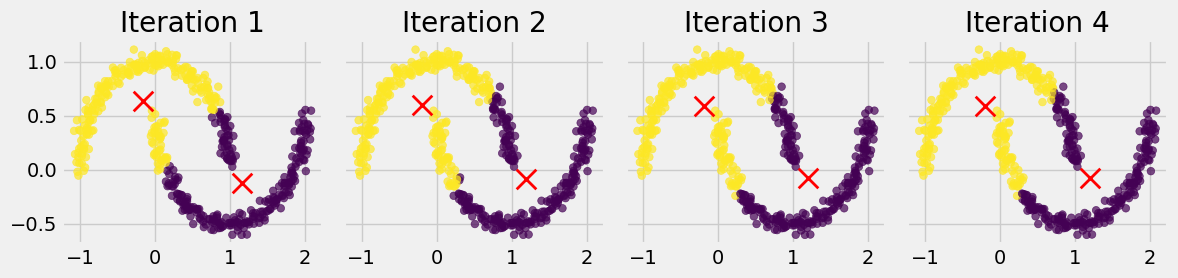

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharex=True, sharey=True)

for i, ax in enumerate(axes):
    centroids, labels = k_means(X_moons, 2, max_iter=i+1, random_state=42)
    ax.scatter(X_moons[:, 0], X_moons[:, 1], c=labels, s=30, cmap='viridis', alpha=0.7)
    ax.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], c='red', marker='x', s=200)
    ax.set_title(f"Iteration {i+1}")

plt.tight_layout()
plt.show()

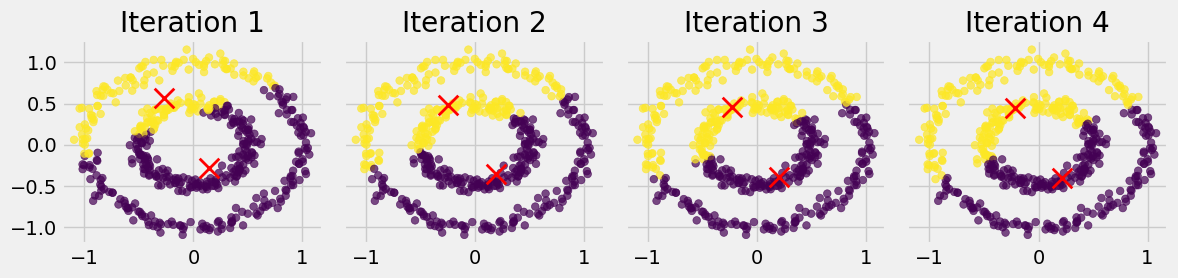

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharex=True, sharey=True)

for i, ax in enumerate(axes):
    centroids, labels = k_means(X_circles, 2, max_iter=i+1, random_state=42)
    ax.scatter(X_circles[:, 0], X_circles[:, 1], c=labels, s=30, cmap='viridis', alpha=0.7)
    ax.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], c='red', marker='x', s=200)
    ax.set_title(f"Iteration {i+1}")

plt.tight_layout()
plt.show()

Ожидаемо, алгоритм кластеризации k-means не может справиться с задачами, где данные не могут быть линейно разделены.

## Часть 2. DBSCAN

**Задание 6 (1 балл)**

Создайте три экземпляра класса DBSCAN, передав в него значения параметров
`eps=1`, `min_samples=5`. Сохраните их в переменные `dbscan_blobs`, `dbscan_moons` и `dbscan_circles`. Передайте следующие значения параметров:

* `eps=1`, `min_samples=5` для blobs;
* `eps=0.3`, `min_samples=5` для moons;
* `eps=0.2`, `min_samples=5` для circles.

Обучите модели на соответствующих данных.

In [14]:
from sklearn.cluster import DBSCAN

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
dbscan_blobs = DBSCAN(eps=1, min_samples=5)
dbscan_moons = DBSCAN(eps=0.3, min_samples=5)
dbscan_circles = DBSCAN(eps=0.2, min_samples=5)

dbscan_blobs.fit(X_blobs)
dbscan_moons.fit(X_moons)
dbscan_circles.fit(X_circles)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

DBSCAN(eps=0.2)

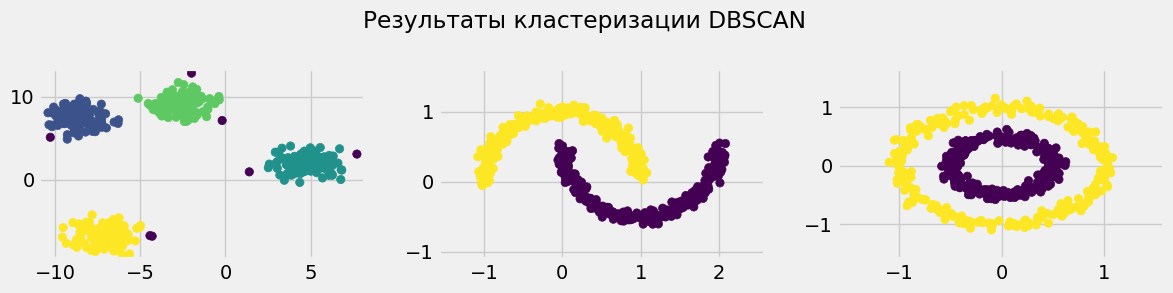

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharex=False, sharey=False)

data = [X_blobs, X_moons, X_circles]
dbscan_models = [dbscan_blobs, dbscan_moons, dbscan_circles]
for i, ax in enumerate(axes):
    ax.scatter(data[i][:, 0], data[i][:, 1], c=dbscan_models[i].labels_, cmap='viridis')
    ax.set_xlim(data[i][:, 0].min() - 0.5, data[i][:, 0].max() + 0.5)
    ax.set_ylim(data[i][:, 1].min() - 0.5, data[i][:, 1].max() + 0.5)

plt.suptitle("Результаты кластеризации DBSCAN")
plt.tight_layout()
plt.show()

Отметим, что DBSCAN пометил некоторые точки как шумовые и хорошо справился со сложными нелинейныим границами и вложенными наборами данных.

## Часть 3. Агломеративная кластеризация

**Задание 7 (1 балл)**

Аналогично предыдущему заданию, создайте и обучите три экземпляра класса AgglomerativeClustering, передав в него подходящие значения параметра `n_clusters`. Сохраните модели в переменные `agglomerative_blobs`, `agglomerative_moons` и `agglomerative_circles` и постройте визуализацию результатов обучения моделей.

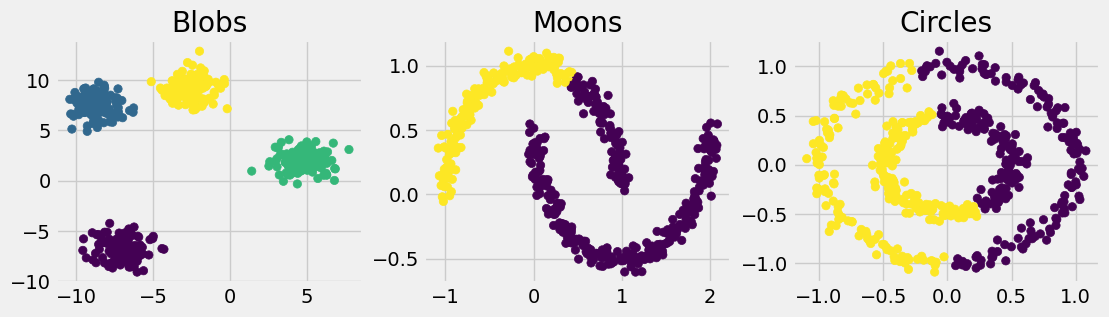

In [18]:
from sklearn.cluster import AgglomerativeClustering

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
agglomerative_blobs = AgglomerativeClustering(n_clusters=4)
agglomerative_moons = AgglomerativeClustering(n_clusters=2)
agglomerative_circles = AgglomerativeClustering(n_clusters=2)

agglomerative_blobs.fit(X_blobs)
agglomerative_moons.fit(X_moons)
agglomerative_circles.fit(X_circles)

labels_blobs = agglomerative_blobs.labels_
labels_moons = agglomerative_moons.labels_
labels_circles = agglomerative_circles.labels_

plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_blobs, cmap='viridis')
plt.title("Blobs")

plt.subplot(1, 3, 2)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, cmap='viridis')
plt.title("Moons")

plt.subplot(1, 3, 3)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=labels_circles, cmap='viridis')
plt.title("Circles")

plt.show()
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

Можно заметить, что AgglomerativeClustering хуже отрабатывает на вложенных кластерах, чем DBSCAN.

## Часть 4. Анализ главных компонент, PCA

**Задание 8 (1 балл)**

Загрузите данные `iris` с помощью `sklearn`. Создайте экземпляр класса PCA, передав в него значение для числа компонент равное двум. Сохраните в переменную pca_iris.

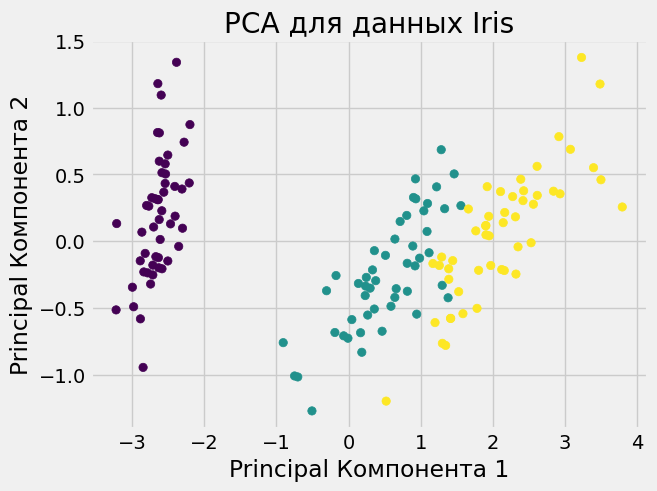

In [19]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

pca_iris = PCA(n_components=2)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

X_iris_pca = pca_iris.fit_transform(X_iris)

# Визуализируем результаты
plt.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=y_iris, cmap='viridis')
plt.title("PCA для данных Iris")
plt.xlabel("Principal Компонента 1")
plt.ylabel("Principal Компонента 2")
plt.show()

Как видно, в случае Iris двух компонент достаточно для хорошего разделения данных по признакам. Попробуем применить этот метод к более сложным данным — набору рукописных цифр MNIST.

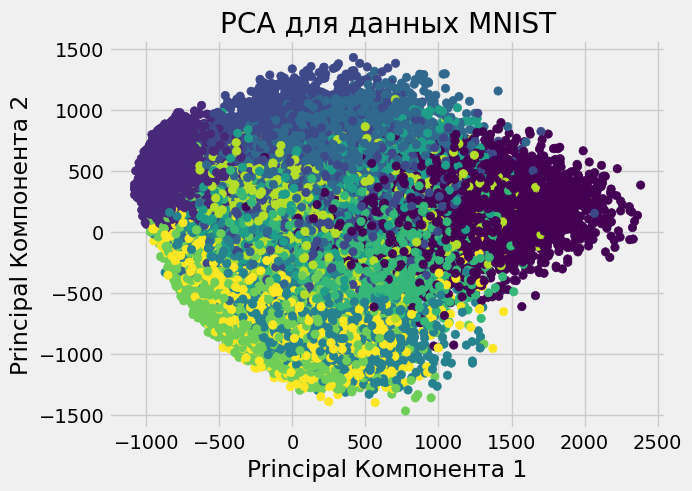

In [20]:
from sklearn.datasets import load_iris, fetch_openml

# Загружаем набор данных MNIST
mnist = fetch_openml('mnist_784', version=1)
X_mnist = mnist.data
y_mnist = mnist.target.astype(int)  # Преобразуем метки в целочисленный тип

pca_mnist = PCA(n_components=2)
X_mnist_pca = pca_mnist.fit_transform(X_mnist)

# Визуализируем результаты
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=y_mnist, cmap='viridis')
plt.title("PCA для данных MNIST")
plt.xlabel("Principal Компонента 1")
plt.ylabel("Principal Компонента 2")
plt.show()


Хотя на графике прослеживается некоторое разделение по классам, этого явно недостаточно для четкого разделения. Рассмотрим другой алгоритм выделения признаков — t-SNE.

## Часть 5. t-SNE

**Задание 9 (1 балл)**

Создайте экземпляр класса [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), передав для выделения двух компонент. Ознакомьтесь с документацией, чтобы правильно импортировать библиотеку.

Сохранить в переменную `tsne_iris` и произведите обучение и преобразование данных. Это можно сделать в два шага, последовательно вызвав функции `fit` и `transform`, но часто оказывается удобнее сделать преобразование данных напрямую с помощью функции с говорящим названием `fit_tranform`. Постройте визуализацию кластеризации.

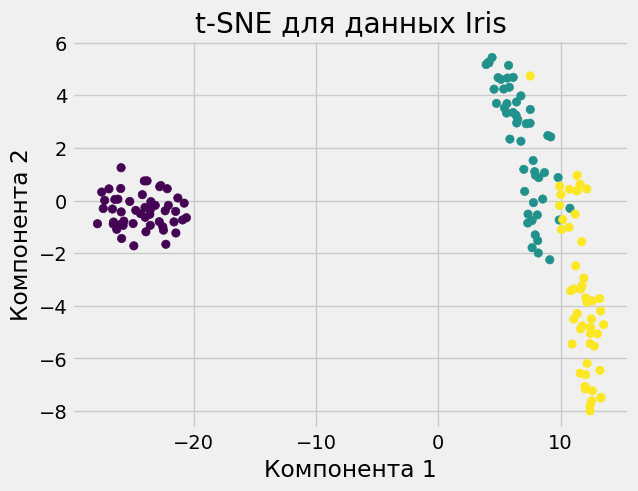

In [ ]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
from sklearn.manifold import TSNE

tsne_iris = TSNE(n_components=2, random_state=42)
X_iris_tsne = tsne_iris.fit_transform(X_iris)

plt.scatter(X_iris_tsne[:, 0], X_iris_tsne[:, 1], c=y_iris, cmap='viridis')
plt.title("t-SNE для данных Iris")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.show()
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

На небольших датасетах разница в качестве PCA и t-SNE не слишком заметна. На больших по размеру датасетах разница в качестве PCA и t-SNE заметна. Однако обратите внимание, что t-SNE также требуется существенно больше времени на вычисления.

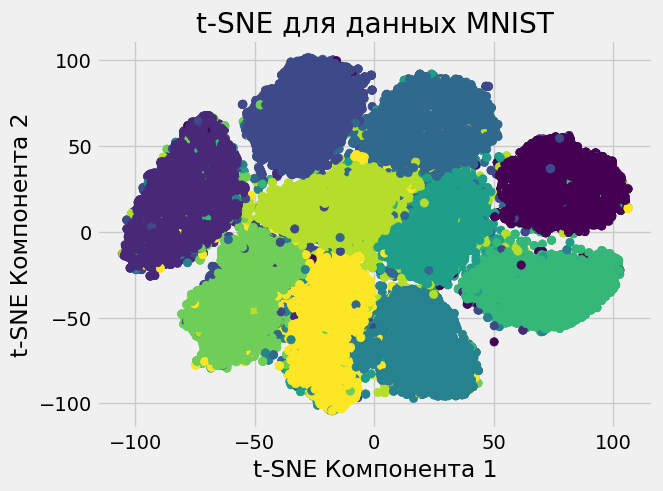

In [23]:
tsne_mnist = TSNE(n_components=2)
X_mnist_tsne = tsne_mnist.fit_transform(X_mnist)

plt.scatter(X_mnist_tsne[:, 0], X_mnist_tsne[:, 1], c=y_mnist, cmap='viridis')
plt.title("t-SNE для данных MNIST")
plt.xlabel("t-SNE Компонента 1")
plt.ylabel("t-SNE Компонента 2")
plt.show()

# Поздравляем!
В этом домашнем задании вы вручную реализовали алгоритм `k-means` и применили его к синтетическим данным, сгенерерованные вами. Вы углубили навыки пользования библиотекой `sklearn` для обучения моделей, создания синтетических данных и научились пользоваться официальной документацией. Мы надеемся, что вы все увереннее чувствуете себя работая с данными и применяя к ним различные методы машинного обучения.